### 1880년 부터 2014년까지의 미국의 아기 이름을 정리해 논 데이터셋

In [1]:
# 데이터 불러오기

baby <- read.csv("./Data/R_Baby_Names_1880-2014.csv",stringsAsFactors = F)
head(baby)

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,01/01/1880 12:00:00 AM,1
Anna,F,2604,01/01/1880 12:00:00 AM,2
Emma,F,2003,01/01/1880 12:00:00 AM,3
Elizabeth,F,1939,01/01/1880 12:00:00 AM,4
Minnie,F,1746,01/01/1880 12:00:00 AM,5
Margaret,F,1578,01/01/1880 12:00:00 AM,6


In [2]:
tail(baby)

,Name,Gender,Count,Year,Year.Rank
1825383,Zyel,M,5,01/01/2014 12:00:00 AM,13972
1825384,Zykeem,M,5,01/01/2014 12:00:00 AM,13973
1825385,Zymeer,M,5,01/01/2014 12:00:00 AM,13974
1825386,Zymiere,M,5,01/01/2014 12:00:00 AM,13975
1825387,Zyran,M,5,01/01/2014 12:00:00 AM,13976
1825388,Zyrin,M,5,01/01/2014 12:00:00 AM,13977


In [3]:
# 문제점 : 필요없는 데이터(동일한 시간대 모든데이터 존재) 있음 

In [4]:
str(baby)

'data.frame':	1825388 obs. of  5 variables:
 $ Name     : chr  "Mary" "Anna" "Emma" "Elizabeth" ...
 $ Gender   : chr  "F" "F" "F" "F" ...
 $ Count    : int  7065 2604 2003 1939 1746 1578 1472 1414 1320 1288 ...
 $ Year     : chr  "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" ...
 $ Year.Rank: int  1 2 3 4 5 6 7 8 9 10 ...


In [5]:
summary(baby)

     Name              Gender              Count             Year          
 Length:1825388     Length:1825388     Min.   :    5.0   Length:1825388    
 Class :character   Class :character   1st Qu.:    7.0   Class :character  
 Mode  :character   Mode  :character   Median :   12.0   Mode  :character  
                                       Mean   :  184.7                     
                                       3rd Qu.:   32.0                     
                                       Max.   :99680.0                     
   Year.Rank    
 Min.   :    1  
 1st Qu.: 1790  
 Median : 4009  
 Mean   : 5301  
 3rd Qu.: 7820  
 Max.   :20548  

In [6]:
baby$Gender <- as.factor(baby$Gender)
str(baby)

'data.frame':	1825388 obs. of  5 variables:
 $ Name     : chr  "Mary" "Anna" "Emma" "Elizabeth" ...
 $ Gender   : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 1 1 1 ...
 $ Count    : int  7065 2604 2003 1939 1746 1578 1472 1414 1320 1288 ...
 $ Year     : chr  "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" ...
 $ Year.Rank: int  1 2 3 4 5 6 7 8 9 10 ...


In [7]:
# baby의 Year부분 정리하기

baby$Year <- substr(baby$Year,7,10)
head(baby)

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,1880,1
Anna,F,2604,1880,2
Emma,F,2003,1880,3
Elizabeth,F,1939,1880,4
Minnie,F,1746,1880,5
Margaret,F,1578,1880,6


In [8]:
# 저장하기

write.csv(baby,"./Data/baby.csv",row.names = F)

In [9]:
summary(baby) # Gender에서 보면 F가 높게 나오는데, 이는 여자이름이 많은 것 뿐 여성비율이 많은게 아님

     Name           Gender          Count             Year          
 Length:1825388     F:1081660   Min.   :    5.0   Length:1825388    
 Class :character   M: 743728   1st Qu.:    7.0   Class :character  
 Mode  :character               Median :   12.0   Mode  :character  
                                Mean   :  184.7                     
                                3rd Qu.:   32.0                     
                                Max.   :99680.0                     
   Year.Rank    
 Min.   :    1  
 1st Qu.: 1790  
 Median : 4009  
 Mean   : 5301  
 3rd Qu.: 7820  
 Max.   :20548  

In [10]:
# baby에서 여자 아이만 Female이라는 dataset을 만들고 row수 구하기

Female <-subset(baby,baby$Gender=="F")
head(Female)
nrow(Female)

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,1880,1
Anna,F,2604,1880,2
Emma,F,2003,1880,3
Elizabeth,F,1939,1880,4
Minnie,F,1746,1880,5
Margaret,F,1578,1880,6


[1] 1081660

In [11]:
# 여자 아이 이름중 중복제거하고 갯수 구하기

length(unique(Female$Name))

[1] 64911

In [12]:
# 유일한 여자 아이 이름 20개만 출력하기

head(unique(Female$Name),20)

[1] "Mary"      "Anna"      "Emma"      "Elizabeth" "Minnie"    "Margaret" 
 [7] "Ida"       "Alice"     "Bertha"    "Sarah"     "Annie"     "Clara"    
[13] "Ella"      "Florence"  "Cora"      "Martha"    "Laura"     "Nellie"   
[19] "Grace"     "Carrie"

---
### 가장 많이 사용된 여자 아이 이름 10개 보여주기


In [17]:
library(dplyr)

In [24]:
head(Female)

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,1880,1
Anna,F,2604,1880,2
Emma,F,2003,1880,3
Elizabeth,F,1939,1880,4
Minnie,F,1746,1880,5
Margaret,F,1578,1880,6


In [27]:
femaleName <- aggregate(Count~Name,Female,sum)
head(femaleName)

Name,Count
Aabha,21
Aabriella,10
Aaden,5
Aadhira,29
Aadhya,639
Aadi,16


In [29]:
head(arrange(femaleName,desc(Count)),10)

Name,Count
Mary,4115282
Elizabeth,1601128
Patricia,1570567
Jennifer,1462742
Linda,1450843
Barbara,1432944
Margaret,1240006
Susan,1120469
Dorothy,1105680
Sarah,1060643


In [30]:
# baby에서 남자 아이만 Male이라는 데이터셋을 만들고 row수 구하기

Male <- subset(baby, Gender =="M")
nrow(Male)

[1] 743728

In [60]:
# 1880~2014년 인구분포 현황 그래프로 만들기

In [37]:
female_현황 <- aggregate(Count~Year,Female,sum)

In [43]:
male_현황 <- aggregate(Count~Year,Male,sum)

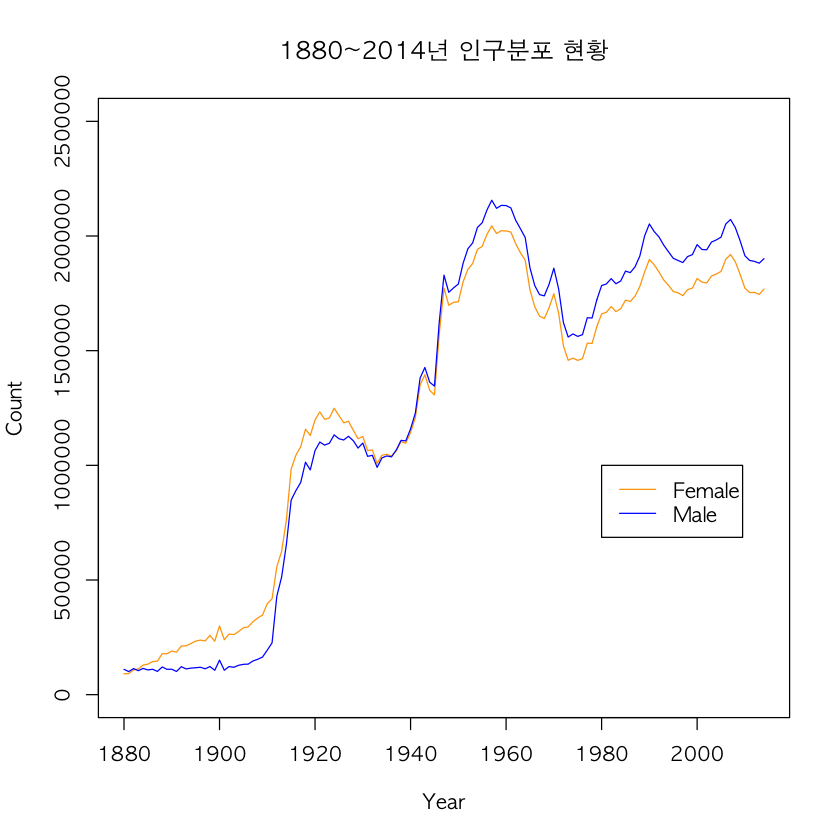

In [61]:
options(warn = -1)
par(family = "AppleGothic")

plot(female_현황,
     main = "1880~2014년 인구분포 현황",
     ylim = c(0,2500000),
     type = "l",
     col = "orange"
    )
lines(male_현황,
      type = "l",
      col = "blue"
     )
legend(1980,1000000,
       c("Female","Male"),
       col = c("orange","blue"),
       lty =  c(1,1) 
      )